### importando dataset

In [ ]:
import pandas as pd 
df = pd.read_csv('../fraud/creditcard.csv')
# dataset utilizado :
#https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud

In [5]:
df = df.drop(columns=['Time'])
df

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,4.356170,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,-0.975926,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,-0.484782,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,-0.399126,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


### conhecendo o dataset
### proporção do target, existencia de Nan...

In [6]:
df['Class'].value_counts()
#proporção do target
print(df['Class'].value_counts() / df['Class'].value_counts().sum() * 100)

Class
0    99.827251
1     0.172749
Name: count, dtype: float64


In [ ]:
print(df.isna().sum())
print(df.isna().value_counts())

In [7]:
df.columns
features = df.columns[0:-1]
features
target = df.columns[-1]
target

'Class'

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(df[features],
df[target], 
test_size=0.2, 
random_state=42)

print(f'taxa de variavel resposta no treino: {y_train.mean()}')

print(f'taxa de variavel resposta no teste: {y_test.mean()}')


taxa de variavel resposta no treino: 0.001729245759178389
taxa de variavel resposta no teste: 0.0017204452090867595


### balanceando dataset, target < 1% 

In [ ]:
#BALANCEAR BASE DE TREINO
!pip install imbalanced-learn   

from imblearn.combine import SMOTEENN
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours

# Criar a instância do SMOTEENN
smote_enn = SMOTEENN(sampling_strategy='minority', random_state=42)

# Balancear os dados de treino
X_train_balanced, y_train_balanced = smote_enn.fit_resample(X_train, y_train)

print(f'Taxa de variável resposta balanceada no treino: {y_train_balanced.mean()}')
print(f'Taxa de variável resposta DESbalanceada no treino: {y_train.mean()}')


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


Taxa de variável resposta balanceada no treino: 0.5007850088630033
Taxa de variável resposta DESbalanceada no treino: 0.001729245759178389


### treinando modelo, Decision Tree

In [10]:
#treinando modelo
from sklearn import tree

arvore = tree.DecisionTreeClassifier(max_depth=7,
                                    min_samples_leaf=500,
                                    random_state=42)
arvore.fit(X_train_balanced, y_train_balanced)

DecisionTreeClassifier(max_depth=7, min_samples_leaf=500, random_state=42)

### avaliando modelo, focando no recall (Decision Tree)

In [ ]:
from sklearn.metrics import recall_score, confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics

tree_pred_train = arvore.predict(X_train_balanced)
tree_acc_train = metrics.accuracy_score(y_train_balanced, tree_pred_train)
print(f'arvore train accuracy: {tree_acc_train}')


#preve nos dados novos (teste)
tree_pred_test = arvore.predict(X_test)
tree_acc_test = metrics.accuracy_score(y_test, tree_pred_test)
print(f'arvore TEST accuracy: {tree_acc_test}')
#%%

#preve nos proprios dados
tree_proba_train = arvore.predict_proba(X_train_balanced)[:,1]
tree_acc_train = metrics.roc_auc_score(y_train_balanced, tree_proba_train)
print(f'arvore train accuracy: {tree_acc_train}')


#preve nos dados novos (teste)
tree_proba_test = arvore.predict_proba(X_test)[:,1]
tree_acc_test = metrics.roc_auc_score(y_test, tree_proba_test)
print(f'arvore TEST accuracy: {tree_acc_test}')

arvore train accuracy: 0.9718916181311724
arvore test accuracy: 0.9747726554545135
arvore train accuracy: 0.9950619296333132
arvore test accuracy: 0.9688318278915393


Recall (Train): 0.9680112916842549
Recall (Test): 0.8775510204081632
Specificity (Train): 0.9757841481004451
Specificity (Test): 0.9749402082160945

Matriz de Confusão (Train):

Matriz de Confusão (Test):


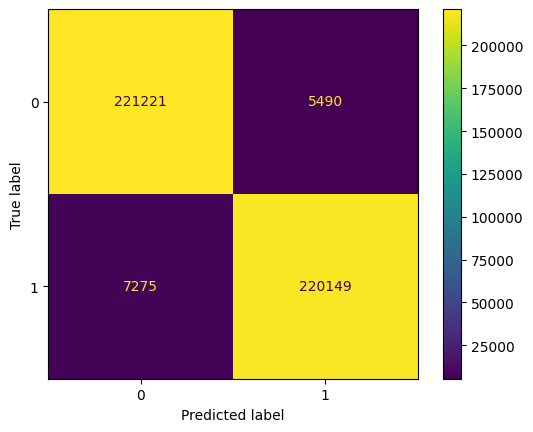

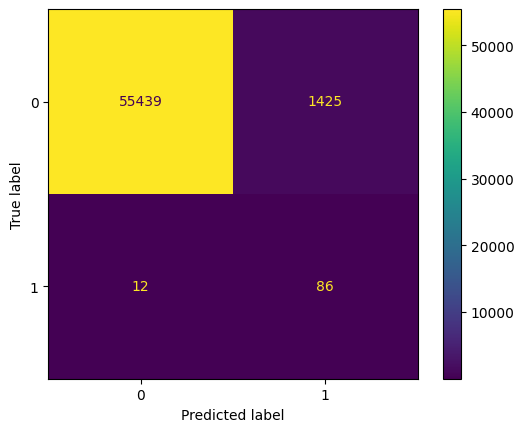

In [ ]:
# Previsão para os dados de treino
tree_pred_train = arvore.predict(X_train_balanced)

# Previsão para os dados de teste
tree_pred_test = arvore.predict(X_test)

# Cálculo do Recall (Sensibilidade)
recall_train = recall_score(y_train_balanced, tree_pred_train)
recall_test = recall_score(y_test, tree_pred_test)

# Matriz de confusão e cálculo da Especificidade
cm_train = confusion_matrix(y_train_balanced, tree_pred_train)
cm_test = confusion_matrix(y_test, tree_pred_test)

# Extrai os valores da matriz de confusão
tn_train, fp_train, fn_train, tp_train = cm_train.ravel()
tn_test, fp_test, fn_test, tp_test = cm_test.ravel()

# Cálculo da Especificidade
specificity_train = tn_train / (tn_train + fp_train)
specificity_test = tn_test / (tn_test + fp_test)

print(f"Recall (Train): {recall_train}")
print(f"Recall (Test): {recall_test}")
print(f"Specificity (Train): {specificity_train}")
print(f"Specificity (Test): {specificity_test}")

C:\Users\83027\AppData\Local\Temp\ipykernel_47516\2005976943.py:20: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')  # Linha de referência


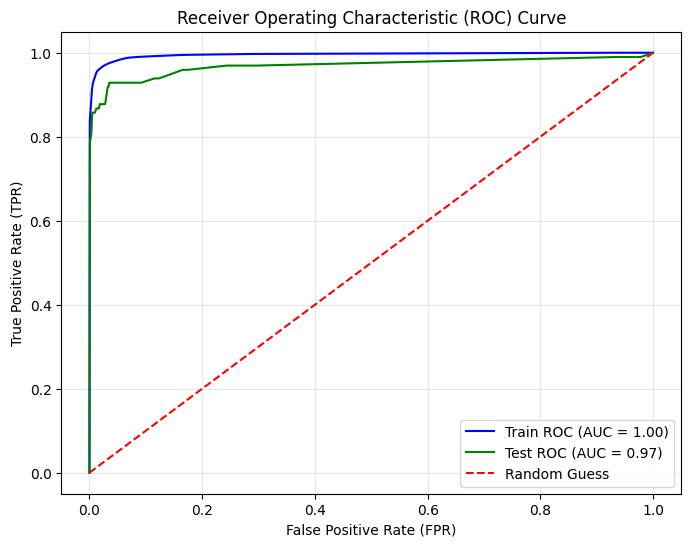

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Previsões de probabilidade
tree_proba_train = arvore.predict_proba(X_train_balanced)[:, 1]
tree_proba_test = arvore.predict_proba(X_test)[:, 1]

# Calcula os pontos da curva ROC para os dados de treino
fpr_train, tpr_train, thresholds_train = roc_curve(y_train_balanced, tree_proba_train)
roc_auc_train = auc(fpr_train, tpr_train)

# Calcula os pontos da curva ROC para os dados de teste
fpr_test, tpr_test, thresholds_test = roc_curve(y_test, tree_proba_test)
roc_auc_test = auc(fpr_test, tpr_test)

plt.figure(figsize=(8, 6))
plt.plot(fpr_train, tpr_train, label=f'Train ROC (AUC = {roc_auc_train:.2f})', color='blue')
plt.plot(fpr_test, tpr_test, label=f'Test ROC (AUC = {roc_auc_test:.2f})', color='green')
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess', color='red')  # Linha de referência
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(alpha=0.3)
plt.show()

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier

# Define os parâmetros para o Grid Search
param_grid = {
    'min_samples_leaf': [1, 100, 500, 1000, 5000, 10000],
    'max_depth': [1, 2, 3, 5, 7]
}

# Define o modelo
tree = DecisionTreeClassifier(random_state=42)

# Configura o GridSearchCV
grid_search = GridSearchCV(
    estimator=tree,
    param_grid=param_grid,
    scoring='roc_auc',  # Avaliando com base no AUC-ROC
    cv=5,  # Validação cruzada com 5 divisões
    verbose=2,  # Exibe o progresso do processo
    n_jobs=-1  # Paralelismo para acelerar o processo
)

# Executa o Grid Search nos dados de treino
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor combinação de parâmetros
best_params = grid_search.best_params_
print(f'Melhores parâmetros: {best_params}')

# Melhor modelo ajustado
best_model = grid_search.best_estimator_

# Avaliação do modelo nos dados de teste
tree_proba_test = best_model.predict_proba(X_test)[:, 1]
roc_auc_test = metrics.roc_auc_score(y_test, tree_proba_test)
print(f'AUC-ROC nos dados de teste: {roc_auc_test:.2f}')

# min_samples_leaf = 500
# max_depth = 7

Fitting 5 folds for each of 30 candidates, totalling 150 fits
Melhores parâmetros: {'max_depth': 7, 'min_samples_leaf': 500}
AUC-ROC nos dados de teste: 0.97


### treinando Random Forest

In [16]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Inicializa o modelo
random_forest = RandomForestClassifier(n_estimators=150,
                                       criterion='entropy',
                                       max_depth=7,
                                       random_state=42)

# Treina o modelo
random_forest.fit(X_train_balanced, y_train_balanced)

#Previsões
rf_pred_train = random_forest.predict(X_train_balanced)
rf_pred_test = random_forest.predict(X_test)

#accuracy
train_acc = accuracy_score(y_train_balanced, rf_pred_train)
test_acc = accuracy_score(y_test, rf_pred_test)

#recall
train_recall = recall_score(y_train_balanced, rf_pred_train)
test_recall = recall_score(y_test, rf_pred_test)

#especificidade
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_balanced, rf_pred_train).ravel()
train_specificity = tn_train / (tn_train + fp_train)

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, rf_pred_test).ravel()
test_specificity = tn_test / (tn_test + fp_test)

print('RANDOM FOREST: ')
print(f"Train Accuracy: {train_acc}")
print(f"TEST Accuracy: {test_acc}")
print(f"Train Recall: {train_recall}")
print(f"TEST Recall: {test_recall}")
print(f"Train Specificity: {train_specificity}")
print(f"TEST Specificity: {test_specificity}")

RANDOM FOREST: 
Train Accuracy: 0.9727724134893809
TEST Accuracy: 0.9972437765527896
Train Recall: 0.9477759603208105
TEST Recall: 0.8877551020408163
Train Specificity: 0.9978474798311506
TEST Specificity: 0.9974324704558244


### avaliando modelo, focando no recall (Random Forest)

In [17]:

from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix

# Define os parâmetros para o GridSearch
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [1, 2, 3, 5, 7],
    'criterion': ['entropy', 'gini']
}

# Inicializa o modelo
random_forest = RandomForestClassifier(random_state=42)

# Configuração do GridSearchCV
grid_search = GridSearchCV(
    estimator=random_forest,
    param_grid=param_grid,
    scoring='recall',  # Foco no recall
    cv=3,
    n_jobs=-1
)

# Treinamento com o GridSearchCV
grid_search.fit(X_train_balanced, y_train_balanced)

# Melhor modelo encontrado
best_model = grid_search.best_estimator_

# Previsões com o melhor modelo
rf_pred_train = best_model.predict(X_train_balanced)
rf_pred_test = best_model.predict(X_test)

# Avaliação (accuracy)
train_acc = accuracy_score(y_train_balanced, rf_pred_train)
test_acc = accuracy_score(y_test, rf_pred_test)

# Avaliação (recall)
train_recall = recall_score(y_train_balanced, rf_pred_train)
test_recall = recall_score(y_test, rf_pred_test)

# Avaliação (especificidade)
tn_train, fp_train, fn_train, tp_train = confusion_matrix(y_train_balanced, rf_pred_train).ravel()
train_specificity = tn_train / (tn_train + fp_train)

tn_test, fp_test, fn_test, tp_test = confusion_matrix(y_test, rf_pred_test).ravel()
test_specificity = tn_test / (tn_test + fp_test)

# Impressão dos resultados
print('MELHOR MODELO (GRID SEARCH):')
print(f"Melhores Hiperparâmetros: {grid_search.best_params_}")
print(f"Train Accuracy: {train_acc}")
print(f"TEST Accuracy: {test_acc}")
print(f"Train Recall: {train_recall}")
print(f"TEST Recall: {test_recall}")
print(f"Train Specificity: {train_specificity}")
print(f"TEST Specificity: {test_specificity}")

MELHOR MODELO (GRID SEARCH):
Melhores Hiperparâmetros: {'criterion': 'gini', 'max_depth': 7, 'n_estimators': 150}
Train Accuracy: 0.9714732403360234
TEST Accuracy: 0.9968399985955549
Train Recall: 0.9455246587871113
TEST Recall: 0.8877551020408163
Train Specificity: 0.9975034294762936
TEST Specificity: 0.9970279966235228


### resultados satisfatório, recall de 0.8877 